In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [18]:
training_labels = pd.read_csv("set_entrenamiento.csv", low_memory=False)
labels_predict = pd.read_csv("trocafone_kaggle_test.csv", low_memory=False)
data = pd.read_csv("data_set.csv", low_memory = False)

In [19]:
training_labels = training_labels[['person','label']]
training_labels['label'].value_counts()

1    980
0    980
Name: label, dtype: int64

In [20]:
#data = data[['person','days_since_last_session','checkout','promedio dias','sessions','viewed/checkout gral',
#             'total_views', 'viewed product', 'promedio hora','retornos']]
data.head()

,person,Direct,Email,Organic,Paid,Referral,Social,ad campaign hit,brand listing,checkout,...,same_product_max_views,viewed/checkouted min,viewed/checkouted max,viewed/checkout gral,Computer,Smartphone,Tablet,country_Computer,country_Smartphone,country_Tablet
0,0008ed71,2.0,0.0,0.0,0.0,0.0,0.0,0,0,3,...,0.0,-1.0,-1.0,0.00,2.0,0.0,0.0,1.0,0.0,0.0
1,00091926,1.0,0.0,25.0,0.0,0.0,0.0,15,25,2,...,33.0,1.0,0.0,82.00,34.0,0.0,0.0,1.0,0.0,0.0
2,00091a7a,0.0,0.0,0.0,0.0,0.0,0.0,1,5,0,...,1.0,0.0,0.0,-1.00,0.0,1.0,0.0,0.0,1.0,0.0
3,000ba417,0.0,0.0,6.0,0.0,0.0,0.0,1,24,6,...,10.0,1.0,0.0,20.25,6.0,0.0,0.0,1.0,0.0,0.0
4,000c79fe,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,...,3.0,1.0,1.0,1.00,0.0,1.0,0.0,0.0,1.0,0.0


In [21]:
features = pd.merge(training_labels, data, on='person', how='inner')
features = features.fillna(0)
features['label'].value_counts()

1    980
0    980
Name: label, dtype: int64

In [22]:
labels = features['label']
features = features.drop(['label','person'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)
print("Train: ",len(x_train),"Test: ",len(x_test))

Train:  1470 Test:  490


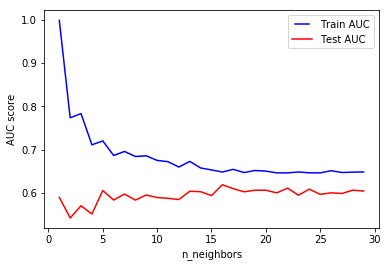

In [23]:
neighbors = list(range(1,30))
train_results = []
test_results = []
for n in neighbors:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(neighbors, train_results, 'b', label='Train AUC')
line2, = plt.plot(neighbors, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_neighbors')
plt.show()

In [24]:
neighbors = list(range(1,30))
metrics = ['euclidean','manhattan','cosine','jaccard','hamming']
train_results = []
test_results = []
best = [0,1,1]
for n in neighbors:
    for m in metrics:
        model = KNeighborsClassifier(n_neighbors=n, metric=m)
        model.fit(x_train, y_train)
        train_pred = model.predict(x_train)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        train_results.append(roc_auc)
        y_pred = model.predict(x_test)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        test_results.append(roc_auc)
        if best[0] < roc_auc:
            best[0] = roc_auc
            best[1] = n
            best[2] = m
        #print(roc_auc)


In [25]:
max(test_results)

0.7821443471005424

In [26]:
best

[0.7821443471005424, 19, 'jaccard']

In [27]:
set_test = pd.merge(data,labels_predict,on = "person", how = "right")
personas = set_test["person"]
set_test = set_test.drop(columns=['person'])

In [28]:
model = KNeighborsClassifier(n_neighbors=best[1], metric=best[2])
model.fit(x_train, y_train)
train_pred = model.predict(x_train)
y_pred = model.predict(x_test)

preds_kaggel_knn = model.predict(set_test)

In [29]:
preds_kaggel_knnpreds_kag  = preds_kaggel_knn.tolist()
df_kaggel_knn = pd.DataFrame(preds_kaggel_knn)
df_kaggel_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19415 entries, 0 to 19414
Data columns (total 1 columns):
0    19415 non-null int64
dtypes: int64(1)
memory usage: 151.8 KB


In [30]:
# df_kaggel_knn = df_kaggel_knn.to_frame()# df_kagg 
df_kaggel_knn["person"] = personas
df_kaggel_knn.rename(columns = {0: 'label'},inplace = True) 
df_kaggel_knn = df_kaggel_knn[['person','label']]

In [31]:
df_kaggel_knn["label"].value_counts()

0    13856
1     5559
Name: label, dtype: int64

In [32]:
df_kaggel_knn.to_csv('ResultadosKNN.csv',index=False)